In [1]:
from PIL import Image
import os, glob
import wave
import random, math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import preprocessing
import IPython.display as ipd
import evaluate
from sklearn import datasets

/Users/aki/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/aki/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass strategy=mean as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [2]:
#音声が保存されているルートディレクトリのパス
root_dir = "bass"

# 音
categories = ["4A","3A"]

In [3]:
# 画像データ用配列
X = []
# ラベルデータ用配列
Y = []

In [4]:
#画像yデータごとにadd_sample()を呼び出し、X,Yの配列を返す関数
def make_sample(files):
    global X, Y
    X = []
    Y = []
    for cat, fname in files:
        add_sample(cat, fname)
    return np.array(X), np.array(Y)

In [5]:
#渡された画像データを読み込んでXに格納し、また、
#画像データに対応するcategoriesのidxをY格納する関数
def add_sample(cat, fname):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((576, 576))
    data = np.asarray(img)
    print('data:',data)
    X.append(data)
    Y.append(cat)

In [6]:
#全データ格納用配列
allfiles = []

In [7]:
#カテゴリ配列の各値と、それに対応するidxを認識し、全データをallfilesにまとめる
for idx, cat in enumerate(categories):
    image_dir = root_dir + "/" + cat +  "/melsp"
    files = glob.glob(image_dir + "/*.jpg")
    for f in files:
        allfiles.append((idx, f))

In [8]:
#シャッフル後、学習データと検証データに分ける
random.shuffle(allfiles)
th = math.floor(len(allfiles) * 0.8)
train = allfiles[0:th]
test  = allfiles[th:]
X_train, y_train = make_sample(train)
X_test, y_test = make_sample(test)
xy = (X_train, X_test, y_train, y_test)
#データを保存する（データの名前を「bass_data.npy」としている）
np.save("date/bass_data.npy", xy)

data: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
data: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 2

data: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
data: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 2

/Users/aki/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [9]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization
from keras.models import Model, Sequential

model = Sequential()
model.add(Conv2D(input_shape=(576, 576, 3), filters=32,kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

Using TensorFlow backend.


In [10]:
#モデルのコンパイル

model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#データの準備

from keras.utils import np_utils
import numpy as np

categories = ["４A","3A"]
nb_classes = len(categories)

X_train, X_test, y_train, y_test = np.load("date/bass_data.npy", allow_pickle=True)

#データの正規化
X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255

#kerasで扱えるようにcategoriesをベクトルに変換
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)
print(y_train)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [12]:
#モデルの学習

model = model.fit(X_train, y_train, batch_size=32, epochs=10) 

Epoch 1/10
32/32 [==============================] - 8s 238ms/step - loss: 0.7707 - accuracy: 0.3750
Epoch 2/10
32/32 [==============================] - 5s 165ms/step - loss: 0.2404 - accuracy: 0.9375
Epoch 3/10
32/32 [==============================] - 4s 133ms/step - loss: 0.1122 - accuracy: 0.9688
Epoch 4/10
32/32 [==============================] - 4s 132ms/step - loss: 0.0658 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 5s 141ms/step - loss: 0.0346 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 5s 162ms/step - loss: 0.0302 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 5s 144ms/step - loss: 0.0492 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 4s 140ms/step - loss: 0.0291 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 4s 134ms/step - loss: 0.0281 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 4s 130ms/step - loss: 0.0351 - accuracy: 1.0000

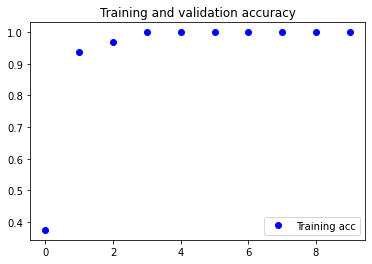

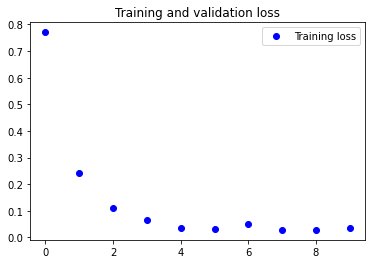

In [13]:
acc = model.history['accuracy']
loss = model.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('精度を示すグラフのファイル名')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('損失値を示すグラフのファイル名')


In [14]:
score = model.model.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

8/8 [==============================] - 1s 66ms/step
Test loss: 19.929676055908203
Test accuracy: 0.625


In [15]:
#モデルの保存

json_string = model.model.to_json()
open('bass/output/bass_predict.json', 'w').write(json_string)

#重みの保存

hdf5_file = "bass/output/bass_predict.hdf5"
model.model.save_weights(hdf5_file)